<a href="https://colab.research.google.com/github/bien3008/AI_Assignment/blob/main/shift_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
data = fetch_openml('mnist_784', version = 1, as_frame = False)
X,y = data['data'], data['target']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0, stratify = y)


In [21]:
for image in y_train:
  print(image)
  break

7


(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

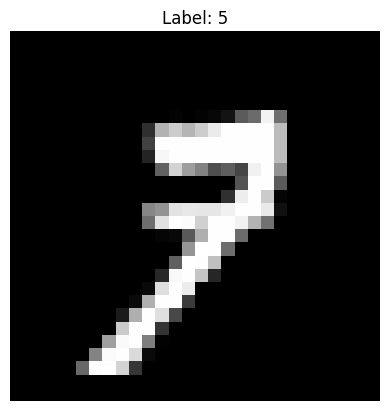

In [10]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0].reshape(28, 28), cmap='gray')
plt.title(f"Label: {y[0]}")
plt.axis('off')

In [5]:
from scipy.ndimage import shift
def shiftImage(image, dy, dx):
  img = image.reshape((28,28))
  shifted = shift(img, shift=(dy,dx), mode = 'reflect')
  return shifted.reshape([-1])


In [22]:
import numpy as np
X_train_augmented = [image for image in X_train]
y_train_augmented = [label for label in y_train]

for dy, dx in ((-1,0), (1,0), (0,1), (0,-1)):
  for image in X_train:
    X_train_augmented.append(shiftImage(image, dy, dx))
  for label in y_train:
    y_train_augmented.append(label)
X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

In [23]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(
    n_neighbors = 3,
    weights = 'distance',
    metric = 'euclidean'
)
model.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3, weights='distance')

In [24]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9747857142857143
